In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

pd.options.mode.chained_assignment = None



In [30]:
df_original = pd.read_csv('data/question_lang.csv')
df_original = df_original[['question_id', 'question_title', 'answer_count', 'java', 'python','js','php']]
df = df_original.sort_values('answer_count', ascending=False)


### 各编程语言问题数 比较

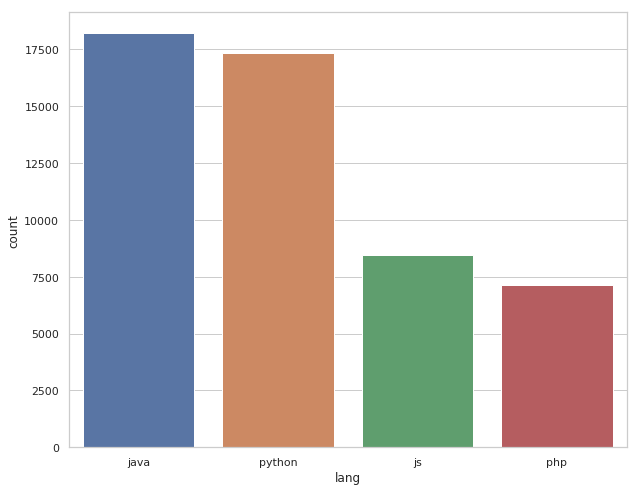

In [95]:
#print(df)
#print(df.loc[df.js>0])
df_lang_count = df[['answer_count', 'java','python','js','php']]
df_sum = df_lang_count.sum()
df_sum = pd.DataFrame({'lang': df_sum.index, 'count': df_sum.values}).loc[1:]


a4_dims = (10.0, 8)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='lang', y='count', data=df_sum, palette=None)


In [93]:
### 各编成语言的回答数 比较

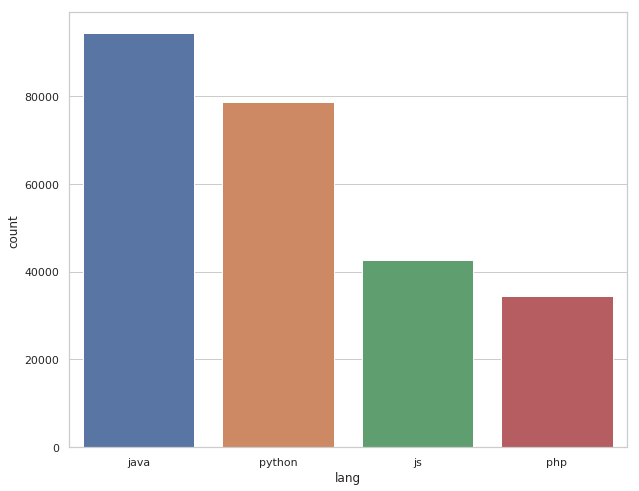

In [94]:
df_melt = df[['question_id', 'answer_count', 'java','python','js','php']]

df_melt = pd.melt(df_melt, id_vars=['question_id','answer_count'], value_vars=['java','python','js','php'])
df_melt = df_melt.loc[df_melt.value > 0]

df_melt = df_melt[['question_id','answer_count','variable']]
df_lang_ans = df_melt.groupby(['variable'])['answer_count'].sum()
df_lang_ans = pd.DataFrame({'lang': df_lang_ans.index, 'count': df_lang_ans.values})
df_lang_ans = df_lang_ans.sort_values(['count'], ascending=False)


a4_dims = (10.0, 8)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='lang', y='count', data=df_lang_ans, palette=None)

In [63]:
#print(df)
def most_answers_lang(lang):
    first = df.loc[df[lang] > 0].iloc[0]
    question_title = first['question_title']
    question_id = first['question_id']
    answer_count = first['answer_count']
    question_url = 'https://www.zhihu.com/question/%s' % question_id
    print('%s 语言回答数最多的问题： %s\n%s\n回答数:%s' % (lang.upper(), question_title, question_url, answer_count))
    
most_answers_lang('java')
    

JAVA 语言回答数最多的问题： 如何看待一些大学生说 3 天学会了 Java？
https://www.zhihu.com/question/66535555
回答数:389


In [64]:
most_answers_lang('python')

PYTHON 语言回答数最多的问题： 学习 Python 很吃力，我是不是可以放弃编程了？
https://www.zhihu.com/question/60766946
回答数:637


In [65]:
most_answers_lang('js')

JS 语言回答数最多的问题： 如何看待哔哩哔哩的 flv.js 作者月薪不到 5000 元？
https://www.zhihu.com/question/53686737
回答数:425


In [66]:
most_answers_lang('php')

PHP 语言回答数最多的问题： 零基础应该选择学习 java、php、前端 还是 python？
https://www.zhihu.com/question/40801731
回答数:334
